<p style="text-align: center;"> <span style="color:firebrick"> <font size="5"> <b> USC Marshall School of Business </b> </font> </p> </span> 

<p style="text-align: center;"> <b> <font font size="5"> DSO 597 - Consulting Project for Stock Navigator </p> </b></font>

<p style="text-align: center;"> <b> Spring 2021 </b> </p>

# Import package and data

In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mlp
from scipy import stats
import time

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

import warnings
warnings.filterwarnings('ignore')

In [2]:
campaign = pd.read_csv('SN-Expert-Trader-Sandbox-Campaigns-1-May-201918-Jul-2021.csv')
adsset =pd.read_csv('SN-Expert-Trader-Sandbox-Ad-sets-1-May-201918-Jul-2021.csv')
ads = pd.read_csv('SN-Expert-Trader-Sandbox-Ads-1-May-201918-Jul-2021.csv')

# Define functions

In [3]:
def dataquality_numeric(raw):
    print(f'Dataset Shape:{raw.shape}')
    numeric_col = raw.select_dtypes(include=['int64','float64'])   
    summary = pd.DataFrame(numeric_col.dtypes,columns = ['dtypes'])
    summary = summary.reset_index()
    summary['Name'] = summary['index']
    summary = summary[['Name','dtypes']]  
    summary['# of Records'] = numeric_col.count().values
    summary['% populated'] = (((len(raw)-numeric_col.isnull().sum().values)/len(raw))*100).round(2)
    summary['# Zeros'] = numeric_col[numeric_col ==0].count().values
    summary['Uniques'] = numeric_col.nunique().values
    summary['Mean'] = numeric_col.mean().values
    summary['Maximum'] = numeric_col.max().values
    summary['Minimum'] = numeric_col.min().values
    summary['Standard Deviation'] = numeric_col.std().values
      
    #Calculate the entropy of a distribution for given probability values.
    for name in summary['Name'].value_counts().index:
        summary.loc[summary['Name'] == name, 'Entropy'] = round(stats.entropy(numeric_col[name].value_counts(normalize = True),base = 2),2)
    return summary

## create a function to summarize the data quality for categorical variables
def dataquality_categorical(raw):
    print(f'Dataset Shape:{raw.shape}')
    categorical_col = raw.select_dtypes(include = ['object','category'])
    #print(categorical_col)
    summary = pd.DataFrame(categorical_col.dtypes, columns = ['dtypes'])
    summary = summary.reset_index()
    summary['Name'] = summary['index']
    summary = summary[['Name','dtypes']]
    summary['# of Records'] = categorical_col.count().values
    summary['% populated'] = (((len(raw) - categorical_col.isnull().sum().values)/(len(raw)))*100).round(2)
    summary['# NA'] = categorical_col.isnull().sum().values \
    + categorical_col[categorical_col =='-1'].count().values
    summary['# Unique_Values'] = categorical_col.nunique().values
    summary['First_Value'] = categorical_col.loc[0].values
    summary['Second_Value'] = categorical_col.loc[1].values
    summary['Third_Value'] = categorical_col.loc[2].values
    count_value = pd.DataFrame(index = categorical_col.columns,columns = ['count'])
    most_common = pd.DataFrame(index = categorical_col.columns,columns = ['MostCommon'])
    #print(count_value)
    #print(most_common)
    for col in categorical_col.columns:
        count_value.loc[col,'count'] = categorical_col[col].value_counts(normalize = True).values[0]*100
        most_common.loc[col,'MostCommon'] = categorical_col[col].mode().values 
        summary['% Most_Common_Field'] = count_value['count'].values.astype(float).round(2)
        summary['Most_Common_Field'] = most_common['MostCommon'].values

    #Calculate the entropy of a distribution for given probability values.
    for name in summary['Name'].value_counts().index:
          summary.loc[summary['Name'] == name, 'Entropy'] = round(stats.entropy(categorical_col[name].value_counts(normalize = True),base = 2),2)
    return summary

# DQR

## Ads

In [4]:
categorical_DQR_ads = dataquality_categorical(ads)
categorical_DQR_ads

Dataset Shape:(909, 69)


,Name,dtypes,# of Records,% populated,# NA,# Unique_Values,First_Value,Second_Value,Third_Value,% Most_Common_Field,Most_Common_Field,Entropy
0,Ad name,object,909,100.00,0,209,8 Ball - Learn Our 1 Proven Wall Street Tradin...,8 Ball - Learn Our 1 Proven Wall Street Tradin...,8 Ball - Learn Our 1 Proven Wall Street Tradin...,4.73,[Tom Story 2m - Learn Our 1 Simple “Wall Stree...,6.78
1,Ad delivery,object,909,100.00,0,5,not_delivering,not_delivering,not_delivering,89.44,[not_delivering],0.65
2,Result indicator,object,641,70.52,268,5,actions:offsite_conversion.custom.691373224629720,actions:offsite_conversion.custom.691373224629720,actions:offsite_conversion.custom.691373224629720,79.25,[actions:offsite_conversion.custom.26481456487...,1.10
3,Ends,object,909,100.00,0,8,Ongoing,Ongoing,Ongoing,98.02,[Ongoing],0.19
4,Attribution setting,object,909,100.00,0,4,28-day click or 1-day view,28-day click or 1-day view,28-day click or 1-day view,45.76,[28-day click or 1-day view],1.61
5,Quality ranking,object,909,100.00,0,6,-,-,-,87.02,[-],0.80
6,Engagement rate ranking,object,909,100.00,0,4,-,-,-,87.02,[-],0.72
7,Conversion rate ranking,object,909,100.00,0,3,-,-,-,87.02,[-],0.58
8,Ad set delivery,object,909,100.00,0,4,inactive,inactive,inactive,81.30,[inactive],0.92
9,Date created,object,909,100.00,0,122,2019-06-19,2019-06-20,2019-06-20,6.60,[2020-05-15],6.12


In [5]:
numeric_DQR_ads = dataquality_numeric(ads)
numeric_DQR_ads

Dataset Shape:(909, 69)


,Name,dtypes,# of Records,% populated,# Zeros,Uniques,Mean,Maximum,Minimum,Standard Deviation,Entropy
0,Results,float64,641,70.52,0,193,1.158253e+02,3.324000e+03,1.000000e+00,3.352720e+02,6.14
1,Cost per results,float64,641,70.52,0,640,1.827185e+01,1.556400e+02,3.760229e-02,1.526682e+01,9.32
2,Reach,int64,909,100.00,105,757,2.207837e+04,8.576440e+05,0.000000e+00,6.733903e+04,8.94
3,Impressions,int64,909,100.00,105,783,3.006565e+04,1.320580e+06,0.000000e+00,9.193079e+04,9.00
4,Amount spent (USD),float64,909,100.00,105,796,6.945089e+02,1.779815e+04,0.000000e+00,1.745084e+03,9.03
5,Cost Per Registration,float64,526,57.87,0,525,2.084836e+01,1.556400e+02,1.825000e+00,1.821561e+01,9.04
6,Delete,float64,773,85.04,773,1,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.00
7,Result rate,float64,641,70.52,0,635,2.855950e-01,1.238415e+01,1.516990e-02,6.623162e-01,9.31
8,Frequency,float64,909,100.00,105,780,1.064632e+00,3.458947e+00,0.000000e+00,4.542317e-01,8.96
9,Clicks (all),int64,909,100.00,125,476,1.797593e+03,1.117430e+05,0.000000e+00,7.322496e+03,7.86


In [6]:
ads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 909 entries, 0 to 908
Data columns (total 69 columns):
 #   Column                                                                   Non-Null Count  Dtype  
---  ------                                                                   --------------  -----  
 0   Ad name                                                                  909 non-null    object 
 1   Ad delivery                                                              909 non-null    object 
 2   Results                                                                  641 non-null    float64
 3   Result indicator                                                         641 non-null    object 
 4   Cost per results                                                         641 non-null    float64
 5   Reach                                                                    909 non-null    int64  
 6   Impressions                                                              9

## Ads set

In [7]:
categorical_DQR_adsset = dataquality_categorical(adsset)
categorical_DQR_adsset

Dataset Shape:(668, 52)


,Name,dtypes,# of Records,% populated,# NA,# Unique_Values,First_Value,Second_Value,Third_Value,% Most_Common_Field,Most_Common_Field,Entropy
0,Ad set name,object,668,100.00,0,618,8 Ball: Penny Stock: United States: Mobile/Des...,8 Ball: Timothy Sykes: United States: Mobile/D...,8 Ball: Trader (finance): United States: Mobil...,0.75,[[07/10/2021] Promoting Tim Luong],9.22
1,Ad set delivery,object,668,100.00,0,4,inactive,inactive,inactive,80.39,[inactive],0.97
2,Result indicator,object,541,80.99,127,5,actions:offsite_conversion.custom.691373224629720,actions:offsite_conversion.custom.691373224629720,actions:offsite_conversion.custom.691373224629720,82.07,[actions:offsite_conversion.custom.26481456487...,0.98
3,Ends,object,668,100.00,0,8,Ongoing,Ongoing,Ongoing,97.31,[Ongoing],0.25
4,Attribution setting,object,668,100.00,0,4,28-day click or 1-day view,28-day click or 1-day view,28-day click or 1-day view,38.62,[28-day click or 1-day view],1.63
5,Date created,object,668,100.00,0,118,2019-06-19,2019-06-20,2019-06-20,5.39,[2021-06-21],6.25
6,Starts,object,668,100.00,0,117,2019-06-19,2019-06-20,2019-06-20,5.39,[2021-06-21],6.21
7,Reporting starts,object,668,100.00,0,1,2019-05-01,2019-05-01,2019-05-01,100.00,[2019-05-01],0.00
8,Reporting ends,object,668,100.00,0,1,2021-07-18,2021-07-18,2021-07-18,100.00,[2021-07-18],0.00
9,Campaign name,object,668,100.00,0,115,Sandbox: Cold Traffic: 8 Ball: Conversions: LC,Sandbox: Cold Traffic: 8 Ball: Conversions: LC,Sandbox: Cold Traffic: 8 Ball: Conversions: LC,4.49,[Sandbox: Cold Traffic: Tom Story 2m: Conversi...,6.47


In [8]:
numeric_DQR_adsset = dataquality_numeric(adsset)
numeric_DQR_adsset

Dataset Shape:(668, 52)


,Name,dtypes,# of Records,% populated,# Zeros,Uniques,Mean,Maximum,Minimum,Standard Deviation,Entropy
0,Results,float64,541,80.99,0,191,1.372384e+02,3.324000e+03,1.000000e+00,3.637156e+02,6.47
1,Cost per results,float64,541,80.99,0,541,1.878710e+01,1.160900e+02,3.760229e-02,1.429451e+01,9.08
2,Reach,int64,668,100.00,44,611,2.976118e+04,8.576440e+05,0.000000e+00,7.739735e+04,8.98
3,Impressions,int64,668,100.00,44,618,4.091309e+04,1.320580e+06,0.000000e+00,1.072310e+05,9.00
4,Amount spent (USD),float64,668,100.00,44,620,9.450827e+02,1.779815e+04,0.000000e+00,2.030180e+03,9.01
5,Cost Per Registration,float64,461,69.01,0,461,2.199770e+01,1.610900e+02,5.312485e+00,2.013717e+01,8.85
6,Delete,float64,616,92.22,616,1,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.00
7,Result rate,float64,541,80.99,0,539,2.852829e-01,1.238415e+01,2.353495e-02,7.152485e-01,9.07
8,Frequency,float64,668,100.00,44,621,1.156581e+00,3.742214e+00,0.000000e+00,4.173926e-01,9.01
9,Clicks (all),int64,668,100.00,48,460,2.446136e+03,1.117430e+05,0.000000e+00,8.535786e+03,8.38


## Campaign

In [9]:
categorical_DQR_campaign = dataquality_categorical(campaign)
categorical_DQR_campaign

Dataset Shape:(120, 50)


,Name,dtypes,# of Records,% populated,# NA,# Unique_Values,First_Value,Second_Value,Third_Value,% Most_Common_Field,Most_Common_Field,Entropy
0,Campaign name,object,120,100.00,0,115,Sandbox: Cold Traffic: 8 Ball: Conversions: LC,Sandbox: Cold Traffic: Tom Story 2m: Conversio...,Scale: Cold Traffic: Tom Story 2m: Conversions...,4.17,[[07/10/2021] Promoting Tim Luong],6.79
1,Campaign delivery,object,120,100.00,0,4,inactive,inactive,inactive,83.33,[inactive],0.83
2,Result indicator,object,104,86.67,16,5,NaN,NaN,NaN,85.58,[actions:offsite_conversion.custom.26481456487...,0.88
3,Ends,object,120,100.00,0,9,Ongoing,Ongoing,Ongoing,88.33,[Ongoing],0.83
4,Attribution setting,object,120,100.00,0,5,28-day click or 1-day view,28-day click or 1-day view,Multiple attribution settings,35.00,[28-day click or 1-day view],1.86
5,Date created,object,120,100.00,0,75,2019-06-19,2019-06-20,2019-08-30,5.00,[2021-06-21],5.95
6,Starts,object,120,100.00,0,74,2019-06-19,2019-06-20,2019-08-30,5.00,[2021-06-21],5.94
7,Reporting starts,object,120,100.00,0,1,2019-05-01,2019-05-01,2019-05-01,100.00,[2019-05-01],0.00
8,Reporting ends,object,120,100.00,0,1,2021-07-18,2021-07-18,2021-07-18,100.00,[2021-07-18],0.00


In [10]:
numeric_DQR_campaign= dataquality_numeric(campaign)
numeric_DQR_campaign

Dataset Shape:(120, 50)


,Name,dtypes,# of Records,% populated,# Zeros,Uniques,Mean,Maximum,Minimum,Standard Deviation,Entropy
0,Results,float64,104,86.67,0,84,5.835000e+02,7.715000e+03,1.000000e+00,1.251415e+03,6.25
1,Cost per results,float64,104,86.67,0,104,1.767663e+01,8.309000e+01,3.760229e-02,1.534388e+01,6.70
2,Reach,int64,120,100.00,5,116,1.381948e+05,1.764381e+06,0.000000e+00,2.933546e+05,6.81
3,Impressions,int64,120,100.00,5,116,2.277495e+05,2.599728e+06,0.000000e+00,5.011624e+05,6.81
4,Amount spent (USD),float64,120,100.00,5,116,5.260961e+03,5.862956e+04,0.000000e+00,1.088960e+04,6.81
5,Cost Per Registration,float64,97,80.83,0,97,3.926365e+01,9.394200e+02,5.580720e+00,1.051787e+02,6.60
6,Delete,float64,115,95.83,115,1,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.00
7,Result rate,float64,104,86.67,0,104,5.273278e-01,1.238415e+01,3.158061e-02,1.588848e+00,6.70
8,Frequency,float64,120,100.00,5,116,1.337043e+00,3.371531e+00,0.000000e+00,4.567868e-01,6.81
9,Clicks (all),int64,120,100.00,5,115,1.361683e+04,2.596940e+05,0.000000e+00,3.786489e+04,6.79


In [11]:
campaign.columns

Index(['Campaign name', 'Campaign delivery', 'Results', 'Result indicator',
       'Cost per results', 'Reach', 'Impressions', 'Amount spent (USD)',
       'Ends', 'Attribution setting', 'Cost Per Registration', 'Delete',
       'Result rate', 'Frequency', 'Clicks (all)', 'CPC (all) (USD)',
       'CTR (all)',
       'Gross impressions (includes invalid impressions from non-human traffic)',
       'Auto-refresh impressions', 'Cost per 1,000 people reached (USD)',
       'CPM (cost per 1,000 impressions) (USD)', 'Page engagement',
       'Page likes', 'Post comments', 'Post engagement', 'Post reactions',
       'Post saves', 'Post shares', 'Cost per Page engagement (USD)',
       'Cost per Page like (USD)', 'Cost per post engagement (USD)',
       'Unique link clicks', 'Unique outbound clicks',
       'Unique CTR (link click-through rate)', 'Unique clicks (all)',
       'Unique CTR (all)', 'Instant Experience clicks to open',
       'Instant Experience clicks to start', 'CPC (cost per l

# Ads score

In [12]:
ads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 909 entries, 0 to 908
Data columns (total 69 columns):
 #   Column                                                                   Non-Null Count  Dtype  
---  ------                                                                   --------------  -----  
 0   Ad name                                                                  909 non-null    object 
 1   Ad delivery                                                              909 non-null    object 
 2   Results                                                                  641 non-null    float64
 3   Result indicator                                                         641 non-null    object 
 4   Cost per results                                                         641 non-null    float64
 5   Reach                                                                    909 non-null    int64  
 6   Impressions                                                              9

In [13]:
ads['Ad name'].value_counts()


Tom Story 2m - Learn Our 1 Simple “Wall Street” Trading Strategy    43
8 Ball - Learn Our 1 Proven Wall Street Trading Strategy            38
What You Don't Need to Trade                                        30
Promovid - Learn Our 1 Simple Wall Street Trading Strategy          26
Tom Driving Video Alt Headline                                      22
                                                                    ..
Father & Son - LAL 1%                                                1
4 Traits - ET 10%                                                    1
Promovid - Tame LP - Free Class: 5 Components - Copy                 1
Rotation - 4 Traits Round 2                                          1
Father/Son                                                           1
Name: Ad name, Length: 209, dtype: int64

1.选几个indiactor

2.计算 mean ,std, 标上标签， 表现都很好的标上有效。 

3. 分析有效的ad name。 

Above average
Average
Below average (bottom 35% of ads)
Below average (bottom 20% of ads)
Below average (bottom 10% of ads)


In [80]:
ads_analysis = ads[['Campaign name', 'Campaign ID', 'Ad set ID',
       'Ad set name','Ad name','Date created', 'Starts', 'Ends','Reporting starts', 'Reporting ends',
     'Impressions','Amount spent (USD)', 'Clicks (all)', 
     'CTR (all)',
     'CPM (cost per 1,000 impressions) (USD)',
     'Page engagement','Page likes',
     'Post comments','Post engagement', 'Post reactions',
       'Post saves', 'Post shares', 
     'Completed ET SS Application (JIT)', 'Registered for ET JIT - EW 4.0',
                   '3-second video plays', 'ThruPlays',
       'Video plays at 25%', 'Video plays at 50%', 'Video plays at 75%',
       'Video plays at 95%', 'Video plays at 100%', 
                    #'Video average play time',
       'Video plays','Cost per Page engagement (USD)','CPC (all) (USD)',
       'Cost per Page like (USD)', 'Cost per post engagement (USD)', 'Cost per ThruPlay (USD)','Cost per 3-second video plays (USD)'
                   ]]
ads_analysis.shape

(909, 38)

In [81]:
ads_analysis.columns[33:]

Index(['CPC (all) (USD)', 'Cost per Page like (USD)',
       'Cost per post engagement (USD)', 'Cost per ThruPlay (USD)',
       'Cost per 3-second video plays (USD)'],
      dtype='object')

In [82]:
# ads_analysis['Quality ranking'].value_counts()
# ads_analysis[ 'Engagement rate ranking'].value_counts()
# ads_analysis[ 'Conversion rate ranking'].value_counts()

The facebook ads diagnositics data are not well populated. it contains a lot of na.

In [83]:
def calculate_stats(col):
    
    quantile_75 = ads_analysis[col].quantile(.75)
    average = ads_analysis[col].mean()
    quantile_35 = ads_analysis[col].quantile(.35)
    quantile_20 = ads_analysis[col].quantile(.2)
    quantile_10 = ads_analysis[col].quantile(.1)
    temp =[]
    score = []
    for i in range(len(ads_analysis)):
        if ads_analysis.loc[i,col] > quantile_75:
            temp.append( 'Above Average (top25%)')
            score.append(6)
        elif ads_analysis.loc[i,col] > average:
            temp.append( 'Above Average')
            score.append(5)
        elif ads_analysis.loc[i,col] == average:
            temp.append( 'Average')
            score.append(4)
        elif ads_analysis.loc[i,col] > quantile_35:
            temp.append( 'Below Average')
            score.append(3)
        elif ads_analysis.loc[i,col] > quantile_20:
            temp.append( 'Below Average(bottom 35%)') 
            score.append(2)
        elif ads_analysis.loc[i,col] > quantile_10:
            temp.append( 'Below Average(bottom 20%)') 
            score.append(1)
        else:
            temp.append( 'Below Average(bottom 10%)') 
            score.append(0)
        #ads_analysis[f'{col}_rank'] = temp
        
    return temp,score

In [84]:
def calculate_stats_cost_col(col):
    
    quantile_75 = ads_analysis[col].quantile(.75)
    average = ads_analysis[col].mean()
    quantile_35 = ads_analysis[col].quantile(.35)
    quantile_20 = ads_analysis[col].quantile(.2)
    quantile_10 = ads_analysis[col].quantile(.1)
    temp =[]
    score = []
    for i in range(len(ads_analysis)):
        if ads_analysis.loc[i,col] > quantile_75:
            temp.append( 'Above Average (top25%)')
            score.append(0)
        elif ads_analysis.loc[i,col] > average:
            temp.append( 'Above Average')
            score.append(1)
        elif ads_analysis.loc[i,col] == average:
            temp.append( 'Average')
            score.append(2)
        elif ads_analysis.loc[i,col] > quantile_35:
            temp.append( 'Below Average')
            score.append(3)
        elif ads_analysis.loc[i,col] > quantile_20:
            temp.append( 'Below Average(bottom 35%)') 
            score.append(4)
        elif ads_analysis.loc[i,col] > quantile_10:
            temp.append( 'Below Average(bottom 20%)') 
            score.append(5)
        else:
            temp.append( 'Below Average(bottom 10%)') 
            score.append(6)
        #ads_analysis[f'{col}_rank'] = temp
        
    return temp,score

In [85]:

for col in ads_analysis.columns[10:33]:
    temp, score = calculate_stats(col)
    ads_analysis[f'{col}_rank'] = temp
    ads_analysis[f'{col}_score'] = score
    
    

In [86]:
for col in ads_analysis.columns[33:38]:
    temp, score = calculate_stats_cost_col(col)
    ads_analysis[f'{col}_rank'] = temp
    ads_analysis[f'{col}_score'] = score

In [87]:
ads_analysis['total_score'] = ads_analysis[ads_analysis.filter(regex=('_score')).columns].sum(axis = 1)

In [88]:
ads_analysis['total_score'].sort_values(ascending= False).head(10).index

Int64Index([277, 288, 16, 62, 41, 374, 24, 280, 377, 25], dtype='int64')

In [89]:
ads_analysis['total_score'].sort_values(ascending= False).tail(10).index

Int64Index([842, 841, 840, 839, 838, 837, 836, 835, 834, 908], dtype='int64')

In [90]:
ads_analysis.iloc[[288, 277, 377, 41, 62, 374, 69, 76, 16, 607],0:8].groupby('Campaign name').count()

,Campaign ID,Ad set ID,Ad set name,Ad name,Date created,Starts,Ends
Campaign name,,,,,,,
Sandbox: Cold Traffic: PromoVid/Mission: Conversions: LC,2,2,2,2,2,2,2
Sandbox: Cold Traffic: Promovid: Conversions: LC,2,2,2,2,2,2,2
Sandbox: Cold Traffic: TT 20s: Conversions: LC,1,1,1,1,1,1,1
Sandbox: Cold Traffic: Tim Running : Multiple Audiences : US 30+,1,1,1,1,1,1,1
Scale: Cold Traffic: 8 Ball: Conversions: LC,1,1,1,1,1,1,1
Scale: Cold Traffic: Tom Story 2m: Conversions: LC,3,3,3,3,3,3,3


In [91]:
ads_analysis.iloc[[288, 277, 377, 41, 62, 374, 69, 76, 16, 607],0:8].groupby('Ad set name').count()

,Campaign name,Campaign ID,Ad set ID,Ad name,Date created,Starts,Ends
Ad set name,,,,,,,
8 Ball: Trader (finance): United States: Mobile/Desktop Feed,1,1,1,1,1,1,1
PromoVid/Mission: LAL5%: US30-60: Manual FB - Copy,1,1,1,1,1,1,1
PromoVid/Mission: Sykes: US30-60: Manual FB,1,1,1,1,1,1,1
Promovid: Lookalike Registration 1%: United States/Canada: Mobile/Desktop Feed,1,1,1,1,1,1,1
Promovid: Penny Stock: United States/Canada: Mobile/Desktop Feed,1,1,1,1,1,1,1
TT 20s: Vietnamese: United States: Mobile/Desktop Feed - Copy,1,1,1,1,1,1,1
Tim Running: Interest - Trading (Personal Finance),1,1,1,1,1,1,1
Tom Story 2m: Day Trader (Relaunch): United States/Canada: Mobile/Desktop Feed,1,1,1,1,1,1,1
Tom Story 2m: Language: Vietnamese: United States: 35+: Mobile/Desktop Feed,1,1,1,1,1,1,1


In [92]:
list(ads_analysis.iloc[[288, 277, 377, 41, 62, 374, 69, 76, 16, 607],4])

['Tom Story 2m - Learn Our 1 Simple “Wall Street” Trading Strategy',
 'TT 20s - Learn Our 1 Simple Wall Street Trading Strategy',
 'Promovid/LAL5 - Learn Our 1 Simple Wall Street Trading Strategy',
 '8 Ball - Learn Our 1 Proven Wall Street Trading Strategy',
 'Tom Story 2m - Learn Our 1 Simple “Wall Street” Trading Strategy',
 'Promovid/Sykes - Learn Our 1 Simple Wall Street Trading Strategy',
 'Promovid - Learn Our 1 Simple Wall Street Trading Strategy',
 'Promovid - Learn Our 1 Simple Wall Street Trading Strategy',
 'Tom Story 2m - Learn Our 1 Simple “Wall Street” Trading Strategy',
 'Tim Running Video']

In [93]:
ads_analysis.iloc[[840, 839, 838, 837, 836, 835, 834, 833, 908, 557],0:8].groupby('Campaign name').count()

,Campaign ID,Ad set ID,Ad set name,Ad name,Date created,Starts,Ends
Campaign name,,,,,,,
-----Creative Bank-----,6,6,6,6,6,6,6
Sandbox: Cold Traffic: April 12 Creatives: Interest Audiences,1,1,1,1,1,1,1
Sandbox: Cold Traffic: FatherSon: Yahoo! Finance: Conversions,1,1,1,1,1,1,1
Sandbox: Cold Traffic: Rotation/TradeBeforeNovember: Conversions: LC,1,1,1,1,1,1,1
WSW SS: Sandbox: Wall Street Top Trades: Cold Traffic: Registrations,1,1,1,1,1,1,1


In [94]:
ads_analysis.groupby('Campaign name')['total_score'].mean().sort_values(ascending= False)

Campaign name
Sandbox: Cold Traffic: PromoVid/Mission: Conversions: LC                             142.750000
Sandbox: Cold Traffic: TT 20s: Conversions: LC                                       134.666667
Sandbox: Cold Traffic: 20s TT: Vietnamese: Conversions: LC                           131.500000
Scale: Cold Traffic: Tom Story 2m: Conversions: LC                                   124.071429
Sandbox: Cold Traffic: 20s TT: Day Trading: Conversions: LC                          124.000000
                                                                                        ...    
Sandbox: Cold Traffic: Static Bland 3: Conversions: LC                                30.000000
Sandbox: Cold Traffic: Static Bland 1: Conversions: LC                                30.000000
Sandbox: Cold Traffic: Static Bland 2: Conversions: LC                                30.000000
Sandbox: Cold Traffic: What You Don't Need: Multiple Audiences: Conversion - Copy     30.000000
-----Creative Bank-----   

In [95]:
ads_analysis.groupby('Campaign name')['total_score'].mean().sort_values()

Campaign name
-----Creative Bank-----                                                               30.000000
Sandbox: Cold Traffic: What You Don't Need: Multiple Audiences: Conversion - Copy     30.000000
Sandbox: Cold Traffic: Static Bland 2: Conversions: LC                                30.000000
Sandbox: Cold Traffic: Static Bland 1: Conversions: LC                                30.000000
Sandbox: Cold Traffic: Static Bland 3: Conversions: LC                                30.000000
                                                                                        ...    
Sandbox: Cold Traffic: 20s TT: Day Trading: Conversions: LC                          124.000000
Scale: Cold Traffic: Tom Story 2m: Conversions: LC                                   124.071429
Sandbox: Cold Traffic: 20s TT: Vietnamese: Conversions: LC                           131.500000
Sandbox: Cold Traffic: TT 20s: Conversions: LC                                       134.666667
Sandbox: Cold Traffic: Pro

In [96]:
## the worst ad name

ads_analysis[ads_analysis['Campaign name'] == "Sandbox: Cold Traffic: What You Don't Need: Multiple Audiences: Conversion - Copy"]['Ad name']

866    What You Don't Need to Trade
867    What You Don't Need to Trade
868    What You Don't Need to Trade
869    What You Don't Need to Trade
870    What You Don't Need to Trade
871    What You Don't Need to Trade
872    What You Don't Need to Trade
873    What You Don't Need to Trade
874    What You Don't Need to Trade
875    What You Don't Need to Trade
876    What You Don't Need to Trade
877    What You Don't Need to Trade
878    What You Don't Need to Trade
879    What You Don't Need to Trade
880    What You Don't Need to Trade
Name: Ad name, dtype: object

In [97]:
## the best ad name 
ads_analysis[ads_analysis['Campaign name'] =='Sandbox: Cold Traffic: PromoVid/Mission: Conversions: LC']['Ad name']

374    Promovid/Sykes - Learn Our 1 Simple Wall Stree...
375    Promovid/DayTrade - Learn Our 1 Simple Wall St...
376    Promovid/LAL2 - Learn Our 1 Simple Wall Street...
377    Promovid/LAL5 - Learn Our 1 Simple Wall Street...
Name: Ad name, dtype: object

In [98]:
# best ad names 
ads_analysis[ads_analysis['Campaign name'] =='Sandbox: Cold Traffic: TT 20s: Conversions: LC']['Ad name']

275    TT 20s - Learn Our 1 Simple Wall Street Tradin...
276    TT 20s - Learn Our 1 Simple Wall Street Tradin...
277    TT 20s - Learn Our 1 Simple Wall Street Tradin...
Name: Ad name, dtype: object

In [99]:
# best ad names 
ads_analysis[ads_analysis['Campaign name'] =='Scale: Cold Traffic: Tom Story 2m: Conversions: LC']['Ad name']

16     Tom Story 2m - Learn Our 1 Simple “Wall Street...
24     Tom Story 2m - Learn Our 1 Simple “Wall Street...
25     Tom Story 2m - Learn Our 1 Simple “Wall Street...
39     Tom Story 2m - Learn Our 1 Simple “Wall Street...
48     Tom Story 2m - Learn Our 1 Simple “Wall Street...
61     Tom Story 2m - Learn Our 1 Simple “Wall Street...
62     Tom Story 2m - Learn Our 1 Simple “Wall Street...
70     Tom Story 2m - Learn Our 1 Simple “Wall Street...
71     Tom Story 2m - Learn Our 1 Simple “Wall Street...
72     Tom Story 2m - Learn Our 1 Simple “Wall Street...
280    Tom Story 2m - Tame LP - Learn Our 1 Simple “W...
288    Tom Story 2m - Learn Our 1 Simple “Wall Street...
291    Tom Story 2m - Learn Our 1 Simple “Wall Street...
831    Tom Story 2m - Learn Our 1 Simple “Wall Street...
Name: Ad name, dtype: object

# Analyze the Ad names

In [101]:
#Remove all punctuations
ads_analysis['Ad name clean'] = ads_analysis['Ad name'].str.replace(r"[^\w\s]", " ")

In [110]:
import nltk
from nltk.corpus import stopwords
stp = set(stopwords.words("english")) 

In [111]:
from nltk.collocations import BigramCollocationFinder, BigramAssocMeasures
from nltk.stem import WordNetLemmatizer
from nltk import word_tokenize
lemmatizer = WordNetLemmatizer()

In [112]:
from nltk.corpus import wordnet

# https://gaurav5430.medium.com/using-nltk-for-lemmatizing-sentences-c1bfff963258
def lemmatize_sentence(sentence):
    #tokenize the sentence and find the POS tag for each token
    nltk_tagged = nltk.pos_tag(nltk.word_tokenize(sentence))  
    #tuple of (token, wordnet_tag)
    wordnet_tagged = map(lambda x: (x[0], nltk_tag_to_wordnet_tag(x[1])), nltk_tagged)
    lemmatized_sentence = []
    for word, tag in wordnet_tagged:
        if tag is None:
            #if there is no available tag, append the token as is
            lemmatized_sentence.append(word)
        else:        
            #else use the tag to lemmatize the token
            lemmatized_sentence.append(lemmatizer.lemmatize(word, tag))
    return lemmatized_sentence

# function to convert nltk tag to wordnet tag
def nltk_tag_to_wordnet_tag(nltk_tag):
    if nltk_tag.startswith('J'):
        return wordnet.ADJ
    elif nltk_tag.startswith('V'):
        return wordnet.VERB
    elif nltk_tag.startswith('N'):
        return wordnet.NOUN
    elif nltk_tag.startswith('R'):
        return wordnet.ADV
    else:          
        return None

In [113]:
lemmatized_names = [lemmatize_sentence(name) for name in ads_analysis['Ad name clean']]

In [115]:
new_documents = []
doc_words = []
for doc in lemmatized_names:
    new_document = []
    for word in doc:
        if word.strip().lower() not in stp:
            new_document.append(word)
            doc_words.append(new_document)
    new_documents.append(' '.join(new_document) )
    
ads_analysis['Ad_name_clean_lemma'] = new_documents

In [116]:
ads_analysis['Ad_name_clean_lemma'] 

0      8 Ball Learn 1 Proven Wall Street Trading Stra...
1      8 Ball Learn 1 Proven Wall Street Trading Stra...
2      8 Ball Learn 1 Proven Wall Street Trading Stra...
3      Tom Story 2m Learn 1 Simple Wall Street Tradin...
4      Tom Story 2m Learn 1 Simple Wall Street Tradin...
                             ...                        
904    WSW Static Wall Street Top Trades Wall Street ...
905    WSW Static Wall Street Top Trades Wall Street ...
906    WSW Static Wall Street Top Trades Wall Street ...
907    WSW Static Wall Street Top Trades Wall Street ...
908    WSW Static Wall Street Top Trades Wall Street ...
Name: Ad_name_clean_lemma, Length: 909, dtype: object

In [140]:
from sklearn.feature_extraction.text import TfidfVectorizer

for i in range(1, 4):

    vectorizer = TfidfVectorizer(ngram_range=(i,i))
    corpus = new_documents

    X = vectorizer.fit_transform(corpus)
    terms = vectorizer.get_feature_names()
    tf_idf = pd.DataFrame(X.toarray().transpose(), index=terms)

    tf_idf = tf_idf.sum(axis=1)
    general_score = pd.DataFrame(tf_idf, columns=["score"])
    general_score.sort_values(by="score", ascending=False, inplace=True)
    print("These are the 20 most common n-grams of size %d"%i)
    print("{}\n".format(general_score.head(20)))

These are the 20 most common n-grams of size 1
                score
tom         65.206249
wall        64.432990
street      64.432990
learn       63.593017
trading     62.709366
static      56.913314
strategy    55.747401
wsw         47.842545
copy        35.119301
simple      34.501721
free        34.219353
trade       30.055483
components  23.477828
class       23.314044
proven      23.171909
need        22.548885
video       21.748832
ball        21.519962
top         21.404858
story       21.307486

These are the 20 most common n-grams of size 2
                         score
wall street          59.470601
trading strategy     42.840062
street trading       42.497298
wsw static           39.898143
simple wall          31.093463
learn simple         30.729742
need trade           30.000000
free class           28.688646
learn proven         21.295890
proven wall          20.959989
investors benefit    19.461129
static investors     19.461129
static learn         19.002003
ball lear

In [128]:
good_index  = list(ads_analysis['total_score'].sort_values(ascending= False).head(200).index)
goodnames = list(ads_analysis.loc[good_index,
                  'Ad_name_clean_lemma'])

In [158]:
for i in range(1, 3):

    vectorizer = TfidfVectorizer(ngram_range=(i,i))
    corpus = goodnames

    X = vectorizer.fit_transform(corpus)
    terms = vectorizer.get_feature_names()
    tf_idf = pd.DataFrame(X.toarray().transpose(), index=terms)

    tf_idf = tf_idf.sum(axis=1)
    good_score = pd.DataFrame(tf_idf, columns=["score"])
    good_score.sort_values(by="score", ascending=False, inplace=True)
    print("These are the 20 most common n-grams of size %d"%i)
    print("{}\n".format(good_score.head(20)))

These are the 20 most common n-grams of size 1
              score
trading   29.335612
learn     29.309666
street    28.573873
wall      28.573873
strategy  28.015913
simple    22.191030
proven    16.939017
ball      16.066712
tom       15.379766
story     15.000580
2m        14.681906
promovid  14.259379
rotation   7.547773
tim        6.998932
stocks     6.796792
basics     6.796792
video      6.579076
free       6.312402
class      6.312402
creative   6.073173

These are the 20 most common n-grams of size 2
                       score
wall street        27.470036
street trading     26.845440
trading strategy   26.842484
learn simple       21.090386
simple wall        21.090386
learn proven       16.054355
proven wall        15.880025
ball learn         15.378366
story 2m           14.435021
tom story          14.435021
2m learn           14.332538
promovid learn     11.668495
free class          8.028322
stocks trading      7.071068
trading basics      7.071068
creative rotation   6

In [159]:
bad_index  = list(ads_analysis['total_score'].sort_values(ascending= True).head(200).index)
badnames = list(ads_analysis.loc[bad_index,
                  'Ad_name_clean_lemma'])

In [160]:
for i in range(1, 3):

    vectorizer = TfidfVectorizer(ngram_range=(i,i))
    corpus = badnames

    X = vectorizer.fit_transform(corpus)
    terms = vectorizer.get_feature_names()
    tf_idf = pd.DataFrame(X.toarray().transpose(), index=terms)

    tf_idf = tf_idf.sum(axis=1)
    bad_score = pd.DataFrame(tf_idf, columns=["score"])
    bad_score.sort_values(by="score", ascending=False, inplace=True)
    print("These are the 20 most common n-grams of size %d"%i)
    print("{}\n".format(bad_score.head(20)))

These are the 20 most common n-grams of size 1
               score
tom        21.625389
static     20.823163
wsw        19.531066
wall       16.719457
street     16.719457
board      13.228946
trade      10.915078
need       10.698050
trading    10.348536
volatile    9.819113
markets     9.819113
free        8.997772
top         8.650016
trades      8.650016
drawing     8.620585
bull        8.620585
scam        8.322787
investors   7.949544
benefit     7.949544
video       7.269498

These are the 20 most common n-grams of size 2
                       score
wsw static         17.162344
wall street        16.134567
need trade         15.000000
tom board          12.210389
free scam          11.359064
static markets      9.144080
markets volatile    9.144080
street bull         8.474242
bull drawing        8.474242
top trades          8.402930
static wall         8.402930
street top          8.402930
static investors    7.419004
investors benefit   7.419004
benefit tom         7.165074


In [161]:
#generate a TF-IDF report that either **visualizes** or explains for a business (non-technical) stakeholder:
def plot_tfidf(df):    
    
    plotscore = df.head(20)
    plotscore.reset_index(inplace= True)
    plotscore = plotscore.sort_values('score',ascending = True)
    
    import numpy as np
    import matplotlib.pyplot as plt
    fig = plt.figure(figsize=(9, 6), facecolor="w")
    x = np.arange(20)
    y = plotscore.score.values
    ax = fig.add_subplot(1, 1, 1)
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    ax.set_frame_on(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()
    ax.set_xlabel("Tf-Idf Score", labelpad=16, fontsize=14)
    #ax.set_title("label = " + str(df.label), fontsize=16)
    ax.ticklabel_format(axis='x', style='sci', scilimits=(-2,2))
    ax.barh(x,y, align='center', color='#3F5D7D')
    ax.set_yticks(x)
    ax.set_ylim([-1, x[-1]+1])
    yticks = ax.set_yticklabels(plotscore['index'])
    plt.subplots_adjust(bottom=0.09, right=0.97, left=0.15, top=0.95, wspace=0.52)
    plt.show()

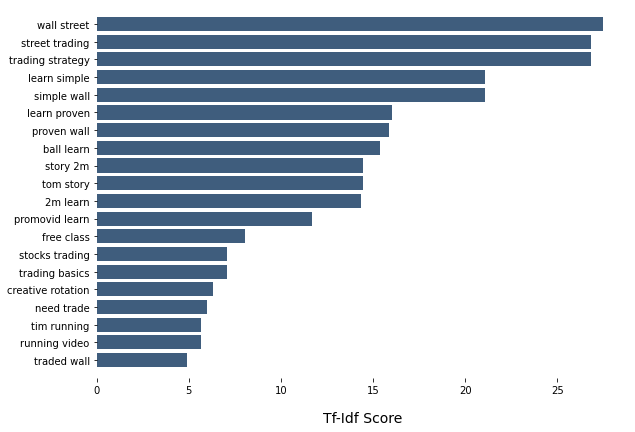

In [162]:
plot_tfidf(good_score)

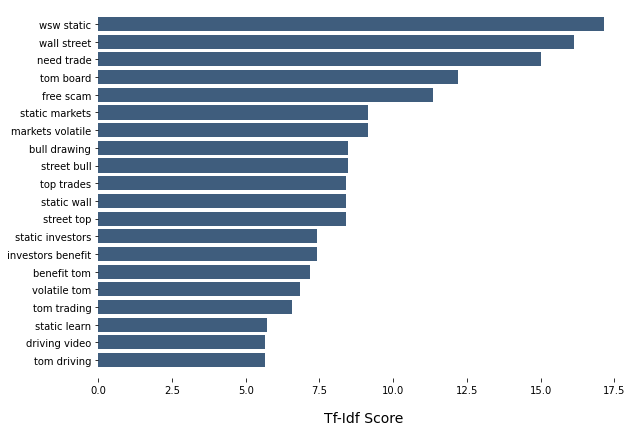

In [163]:
plot_tfidf(bad_score)

Wall Street, Trading Strategy, Free Class, Trading Basics seem to appear more frequently in the good ads. 

# Testing: do 'Wall Street','Free Class' Influence the score of ads? 

In [170]:
## ads that contains 'Wall Street'
ads_analysis['contain_wall_street'] = ads_analysis['Ad_name_clean_lemma'].str.contains(r'wall street', regex = True, case = False )
ads_analysis['contain_free_class'] = ads_analysis['Ad_name_clean_lemma'].str.contains(r'free class', regex = True, case = False )

In [168]:
ads_analysis['contain_wall_street'].sum()/len(ads_analysis)

0.2552255225522552

In [172]:
ads_analysis['contain_free_class'].sum()/len(ads_analysis)

0.03850385038503851

In [176]:
ads['Results']

0      202.0
1      176.0
2      261.0
3        NaN
4        NaN
       ...  
904      NaN
905      NaN
906      NaN
907      NaN
908      NaN
Name: Results, Length: 909, dtype: float64

cost per ET registration 
adjust weight
